# Exercice 0 : échauffement

Q1. Donnez, dans la direction 3’→ 5’, la séquence codée par le brin d'ADN suivant :

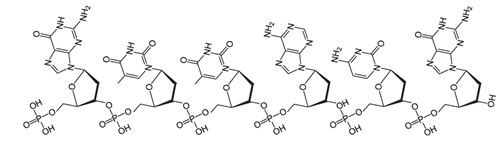

```markdown
GTTACG
```

Q2. Quelle est le peptide codé par la séquence d’ARNm suivante ?

3’– AUAACCAAUAUGCAAGUACAUGCA – 5’


```markdown
AUG AAC GUA UAA
Met Asn Val
```

Q3.	Donnez toutes les séquences d'ARN (AUGC) possibles codant pour la séquence peptidique : TrpGluIleTyr.

```markdown
UGG-GAA-AUU-UAU
UGG-GAA-AUU-UAC
UGG-GAA-AUC-UAU
UGG-GAA-AUC-UAC
UGG-GAA-AUA-UAU
UGG-GAA-AUA-UAC
UGG-GAG-AUU-UAU
UGG-GAG-AUU-UAC
UGG-GAG-AUC-UAU
UGG-GAG-AUC-UAC
UGG-GAG-AUA-UAU
UGG-GAG-AUA-UAC
```

# Exercice 1 : Annotation de cadres de lectures ouverts

Voici en cadeau le code génétique

In [ ]:
genecode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}


Q1. Téléchargez à partir de

https://www.ncbi.nlm.nih.gov/datasets/genome/

la séquence complète du génome de l’Adeno Associated Virus 2 (AAV2, identifiant NC_001401.2), **au format FASTA**.
La séquence doit faire 4679 bp.

Q2. Expliquez le format FASTA.

```
Le format fasta est un format de fichier texte utilisé pour stocker des séquences biologiques de nature nucléique ou protéique. Ces séquences sont représentées par une suite de lettres codant des acides nucléiques ou des acides aminés selon la nomenclature IUPAC```

## Cadres de lecture ouverts
L’annotation de séquences consiste à trouver les différents éléments présents dans une séquence (e.g. un génome), en particulier la position des différents gènes. Une manière grossière de trouver où sont les gènes est de trouver les cadres de lecture ouverts (Open Reading Frames ORFs) qui correspondent à toutes les sous-séquences entre un codon start et un codon STOP.

Q1.	Rappelez la définition d’un codon.

```markdown
Un codon est une séquence de 3 nucléotides sur un arnM
```

Q2.	Quels sont les codons START canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
START: AUG, code pour l'acide aminé M méthionine, et marque le point de départ de la traduction.
```

Q3.	Quels sont les codons STOP canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
STOP: UAA, UAG, UGA, ne codent pas pour des acides aminés, ils marquent la fin de la traduction.
```

Q4. Dans quelle direction un brin d’ADN est-il lu ?

```markdown
Un brn d'adn est lu de 3 -> 5
```

Q5. Comment se structure la molécule d'ADN dans une cellule ?

```markdown
La molécule d'adn est sous la forme de double brin, ou deux brin d'adn viennent s'associer pour former une molécule. Cette association se fait par des liaisons hydrogènes entre nucléotides complémentaires.
```

Q6. Quel(s) brin(s) de la molécule d'ADN peut (peuvent) porter un gène ?

```markdown
Les deux brins de la molécule d'adn peuvent porter un gène
```

Q7. Qu’est-ce que le cadre de lecture ? Combien en existe-t-il ?

```markdown
Le cadre de lecture est un mode de regroupement des nucléotides constituant la séquence d'un acide nucléique (ADN et ARN)en triplets consécutifs. Il est existe 6 différents, 3 de 5 -> 3 et 3 de 3 -> 5.
```

Q8. Quand utilise-t-on un cadre de lecture pour interpréter une séquence d’ADN ?

```markdown
Lors de la phase de traduction, uniquement à partir du moment ou l'on à trouvé un codon AUG
```

Q9.	Donnez l’ensemble des ORFs présents dans le génome de l’AAV2. Présentez vos résultats au format FASTA où pour chaque ORF vous fournissez les informations :
```MARKDOWN
> pos début, pos fin, brin
séquence
```
où "pos début" est la position du premier nucléotide du codon START et "pos fin" est la position du dernier nucléotide du codon STOP (les positions sont comptées depuis le début du brin), brin est l'orientation du brin + ou - (+ est la séquence de base; - est le brin complément inverse) et séquence est simplement la séquence.

In [3]:
!pip install biopython





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.4 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO

from Bio.Seq import Seq

fichier = '/content/NC_001401.2.fna'

brin = []
for sequence in SeqIO.parse(fichier, "fasta"):

    brin = Seq(str(sequence.seq))

    brinComplémentaire = brin.reverse_complement()

    #print(brin)
    #print(brinComplémentaire)

    codon_start = "ATG"
    codons_stop = ["TAA", "TAG", "TGA"]
    orfs = []

    for i in range(len(brin) - 2):
        if brin[i:i+3] == codon_start:
            tmp = []
            for j in range(i+3, len(brin) - 2):
                codon = brin[j:j+3]
                tmp.append(codon)
                if codon in codons_stop and (j-i) % 3 == 0:
                    orfs.append(tmp)
                    break


    orfsCmp = []

    for i in range(len(brinComplémentaire) - 2):
        if brinComplémentaire[i:i+3] == codon_start:
            tmp = []
            for j in range(i+3, len(brinComplémentaire) - 2):
                codon = brinComplémentaire[j:j+3]
                tmp.append(codon)
                if codon in codons_stop and (j-i) % 3 == 0:
                    orfsCmp.append(tmp)
                    break
print(len(orfsCmp), len(orfs))




57 60


Q10.	Combien d’ORFS trouvez-vous ?

In [ ]:
117

Q11. Affichez les ORFs le long du génome sous forme d'un graphe (en x les positions le long du génome, en y "l'id" de l'ORF) où chaque ORF est représentée per une ligne horizontale entre les positions de départ de de fin et une valeur y par ORF.

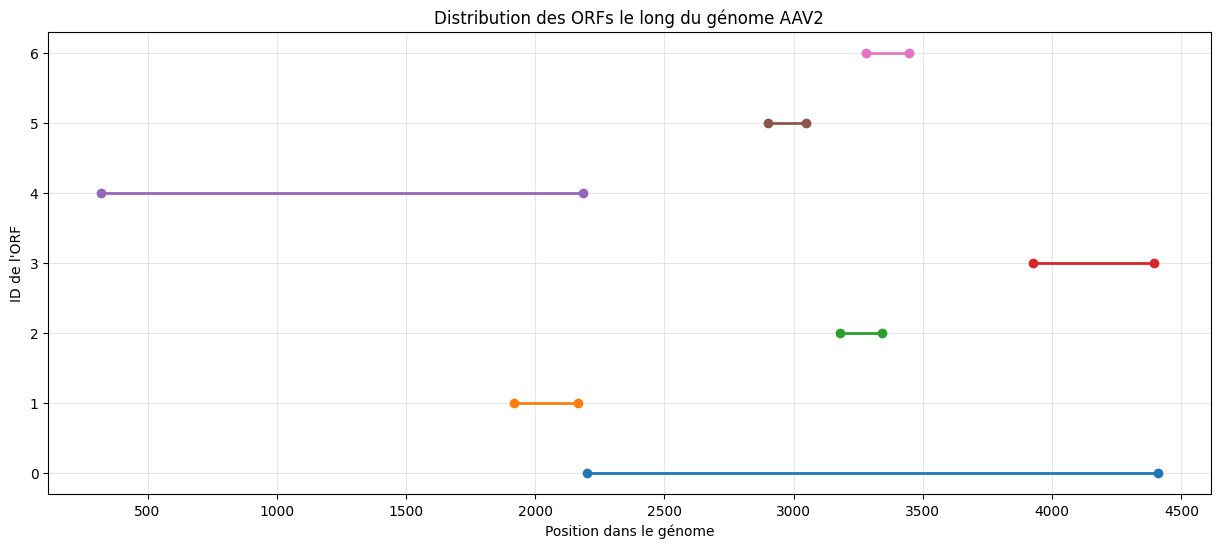

In [12]:
import matplotlib.pyplot as plt
import numpy as np

genome = SeqIO.read("/content/NC_001401.2.fna", "fasta")
sequence = str(genome.seq)

def find_orfs(sequence, min_length=150):
    orfs = []
    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]

    for frame in range(3):
        i = frame
        while i < len(sequence) - 2:
            if sequence[i:i+3] == start_codon:
                start_pos = i
                j = i + 3
                while j < len(sequence) - 2:
                    if sequence[j:j+3] in stop_codons:
                        end_pos = j + 2
                        length = end_pos - start_pos + 1
                        if length >= min_length:
                            orfs.append((start_pos, end_pos, frame))
                        i = j + 3
                        break
                    j += 3
                if j >= len(sequence) - 2:
                    i += 3
            else:
                i += 3
    return orfs

orfs = find_orfs(sequence)

plt.figure(figsize=(15, 6))

for i, (start, end, frame) in enumerate(orfs):
    plt.plot([start, end], [i, i], linewidth=2, marker='o',
             label=f"Frame {frame}" if i < 3 else "")

plt.xlabel('Position dans le génome')
plt.ylabel('ID de l\'ORF')
plt.title('Distribution des ORFs le long du génome AAV2')
plt.grid(True, alpha=0.3)


plt.show()

Q12. En considérant que les différentes la probabilité d’apparition d’un nucléotide à chaque position le long d’un génome sont indépendantes, quelle est la probabilité d’apparition d’un codon START en fonction de la probabilité d’apparition des différents nucléotides $p_A,p_T,p_G,p_C$ ?

```markdown
On considère que les probabilités d'apparition d'un nucléotide à chaque position le ong d'un génome sont indépendantes. La probabilité d'un codon start (ATG), est donc de:
P(START) = P(A) * P(T) * P(G)  
```

Q13. Avec le même modèle, quelle est la probabilité d'apparition d'un codon STOP ?

```markdown
Avec un modèle similaire, la probabilité d'apparition d'un codon stop est de:
P(STOP) = P(TAA) * P(TAG) * P(TGA)
        = P(T) * P(A) * P(A) * P(T) * P(A) * P(G) * P(T) * P(G) * P(A)



```

Q14. Affichez les probabilités d'apparition des codons START et STOP le long du génome de l’AAV2. Pour chaque position vous utilisez une fenêtre glissante de 501 nucléotide centrée sur cette position pour calculer la fréquence d’apparition des différents nucléotides (vous pouvez négliger les 501 premièrs et dernières nucléotides).

In [ ]:
#Votre code ici

Q15.	Téléchargez l’annotation du génome à partir de Genbank :

https://www.ncbi.nlm.nih.gov/datasets/gene/GCF_000838645.1/

Comparez les ORFS que vous avez trouvé avec le génome annoté (on s’intéresse à l’annotation « gene »).

In [ ]:
#Votre code ici

Q16. Qu’observez-vous ?

```markdown
Votre réponse ici
```

# Exercice 2 : biais d’utilisation des codons

Le code génétique étant redondant, plusieurs codons codent pour un même acide aminé. A l’inverse, cela veut dire que pour stocker un même acide aminé dans le génome, un organisme a différentes possibilités. Dans cet exercice, on va étudier si différents organismes ont des préférences différentes pour coder différents acides aminés ?

Q1. Récupperez les génomes des organismes suivants à partir de Genbank:
1.	AAV2 - NC_001401.2
2.	Plasmodium Falciparum 3D7 Chromosome 9 – AL844508
3.	Escherichia coli souche BL21 - NZ_CP053601
4.	Homo Sapiens Chromosome 10 build GRCh38.p14 - NC_000010.11

Q2. Calculez la fréquence d’apparition de chaque codon présents dans chacun de ces génomes.

In [ ]:
#Votre code ici

Q3. Affichez les résultats sous forme de heatmap avec en axe x les acides aminés et en axe y les codons. Chaque case représente en niveau de couleur la fréquence d'apparition d'un codon pour un acide aminé.

In [ ]:
#Votre code ici

Q4. Ces heatmaps sont-elles similaires ?

```markdown
Votre réponse ici
```

# Exercice 3 : optimisation de codons

L’exercice précédent nous a montré qu’il existait bien un biais dans l’utilisation des codons synonymes entre différents organismes. En pratique, si une séquence d’ADN d’un organisme ne suit pas son biais d'utilisation de codons, cela peut avoir un impact sur sa vitesse de traduction et donc la quantité de protéines associées.

Si on souhaite introduire dans un organisme un gène provenant d’un autre organisme il est donc préférable d’optimiser la séquence selon les biais de codons de l’organisme cible.

Q1. Créer un code qui prend en entrée une séquence d’ADN codante et une table de fréquence d’utilisation des codons pour un organisme et retourne la séquence produisant la même protéine mais utilisant uniquement les codons les plus fréquemment utilisés selon la table donnée.

In [ ]:
#Votre code ici

Q2. On va combiner les deux derniers exercices: écrivez un code qui prend en entrée un id de génome et une séquence à optimiser. Votre code télécharge le génome, calcule la table de biais de codons et optimise la séquence d'entrée pour cette table.

In [ ]:
 #Votre code ici